In [5]:
import pandas as pd

In [6]:
air_quality = pd.read_csv("D:/python/.ipynb_checkpoints/yuan/air_quality_no2_long.csv")

In [7]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [8]:
titanic = pd.read_csv("D:/python/.ipynb_checkpoints/yuan/titanic.csv")

In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic.sort_values(by="Age").head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master Viljo",male,0.67,1,1,250649,14.5000,NaN,S
469,470,1,3,"Baclini, Miss Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [11]:
titanic.sort_values(by=['Pclass', 'Age'], ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S


In [12]:
no2 = air_quality[air_quality["parameter"] == "no2"]

In [14]:
no2_subset = no2.sort_index().groupby(["location"]).head(2)

In [15]:
no2_subset

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
1004,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,no2,41.0,µg/m³
1005,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,no2,45.0,µg/m³
1099,London,GB,2019-06-17 11:00:00+00:00,London Westminster,no2,11.0,µg/m³
1100,London,GB,2019-06-17 10:00:00+00:00,London Westminster,no2,11.0,µg/m³


In [16]:
no2_subset.pivot(columns="location", values="value")

location,BETR801,FR04014,London Westminster
0,NaN,20.0,NaN
1,NaN,21.8,NaN
1004,41.0,NaN,NaN
1005,45.0,NaN,NaN
1099,NaN,NaN,11.0
1100,NaN,NaN,11.0


<Axes: >

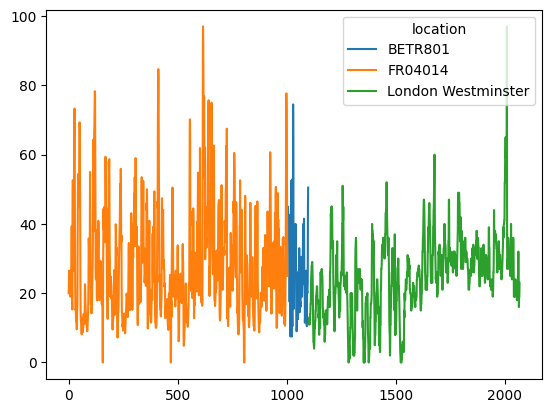

In [17]:
no2.pivot(columns="location", values="value").plot()

In [18]:
air_quality.pivot_table(
    values="value", index="location", columns="parameter", aggfunc="mean"
)

parameter,no2
location,
BETR801,25.778947
FR04014,27.740538
London Westminster,24.777090
